<div style="text-align: center; font-size: 24px; font-weight: bold;">
   World Energy Consumption Analysis
</div>


In this assignment, we will examine the World Energy Consumption dataset maintained by Our World in Data. We will use different visualization techniques to analyze this dataset and try to identify the connections and patterns within it. 






In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

You can download the dataset from [here](https://www.kaggle.com/datasets/pralabhpoudel/world-energy-consumption).

This dataset provides detailed information on global energy consumption trends, highlighting the usage and growth of various energy sources such as solar, wind, and biofuel across different countries over time. It includes demographic and economic indicators, such as population and GDP, to contextualize energy consumption patterns.

In [15]:
# Read the CSV file into a DataFrame
df = pd.read_csv('World Energy Consumption.csv')
# Set Matplotlib settings for use
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams["legend.loc"] = "best"
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14
plt.rcParams["axes.grid"] = True
plt.rcParams['figure.autolayout'] = True

### 1 Temporal Analysis of Energy Consumption 

- Finding the energy consumption of the top 10 most populous countries over the years and visualize this change.

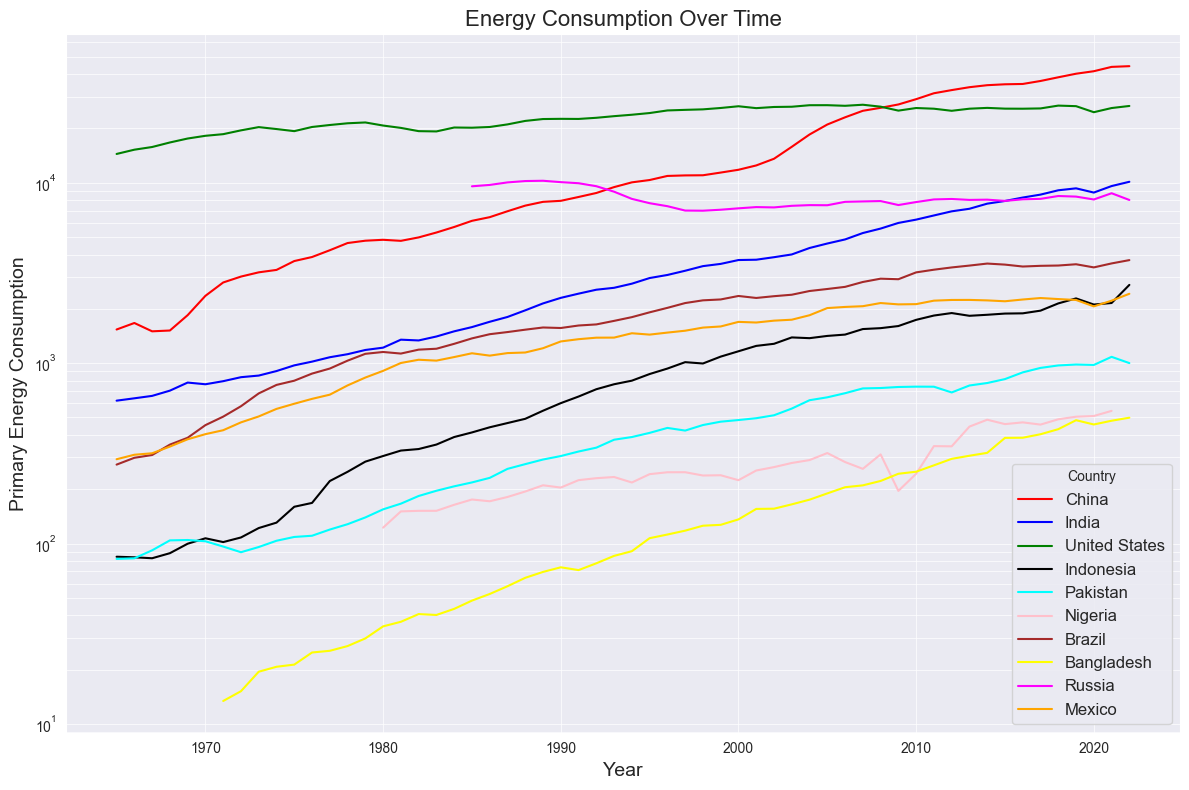

In [16]:
# Take relevant columns and make a copy dataframe
relevant_df = df[["country", "year", "population", "primary_energy_consumption"]].copy()

# Identify and exclude non-country names to get proper data 
non_countries = [
    "World", "Asia", "Lower-middle-income countries",
    "Upper-middle-income countries", "European Union (27)","Africa", "South America","High-income countries",
    "Europe", "North America", "Low-income countries" ]

# Exclude non-country rows
relevant_df = relevant_df[~relevant_df["country"].isin(non_countries)] 
 
# Find the most recent year to obtain the top 10 most populous countries
max_year = relevant_df["year"].max()

# Filter data for the most recent year
recent_year_df = relevant_df[relevant_df["year"] == max_year]

# Sort the data by population in descending order 
sorted_df = recent_year_df.sort_values(by="population", ascending=False)

# Remove duplicate entries for countries and keep the most populous entry
df_deduplicated = sorted_df.drop_duplicates("country", keep="first")

# Select the top 10 countries based on population and convert it a list 
top_10_countries = df_deduplicated.nlargest(10, "population")["country"].tolist()

# Filter the dataset for the top 10 countries across all years
top_countries_data = relevant_df[relevant_df["country"].isin(top_10_countries)].reset_index(drop=True)

# Assign colors to the top 10 countries and utilize a dictionary
color_list = ["red", "blue", "green", "black", "cyan", "pink", "brown", "yellow", "magenta", "orange"]
country_colors_dict = dict()
# Use a for loop in order to fill the dictionary
for i in range(len(top_10_countries)):
    country_colors_dict[top_10_countries[i]] = color_list[i]

# Plot energy consumption trends for the top 10 countries using a for loop to access each 
for country in top_10_countries:
    country_data = top_countries_data[top_countries_data["country"] == country]
    plt.plot(
        country_data["year"],
        country_data["primary_energy_consumption"],
        color = country_colors_dict[country],
        label= country )

# Add plot title, labels, legend, and grid 
plt.title("Energy Consumption Over Time")
plt.xlabel("Year")
plt.ylabel("Primary Energy Consumption")
plt.legend(title="Country")
plt.yscale("log") # To get more appropriate represent 
plt.grid(which="both", linewidth=0.5)

# Display the plot
plt.show()


  ### 2 Energy Consumption per Capita 

- Visualise the energy consumption per capita in 1980, 1990, 2000, 2010 and 2020. (China and America)
- Interpret the resulting table. 


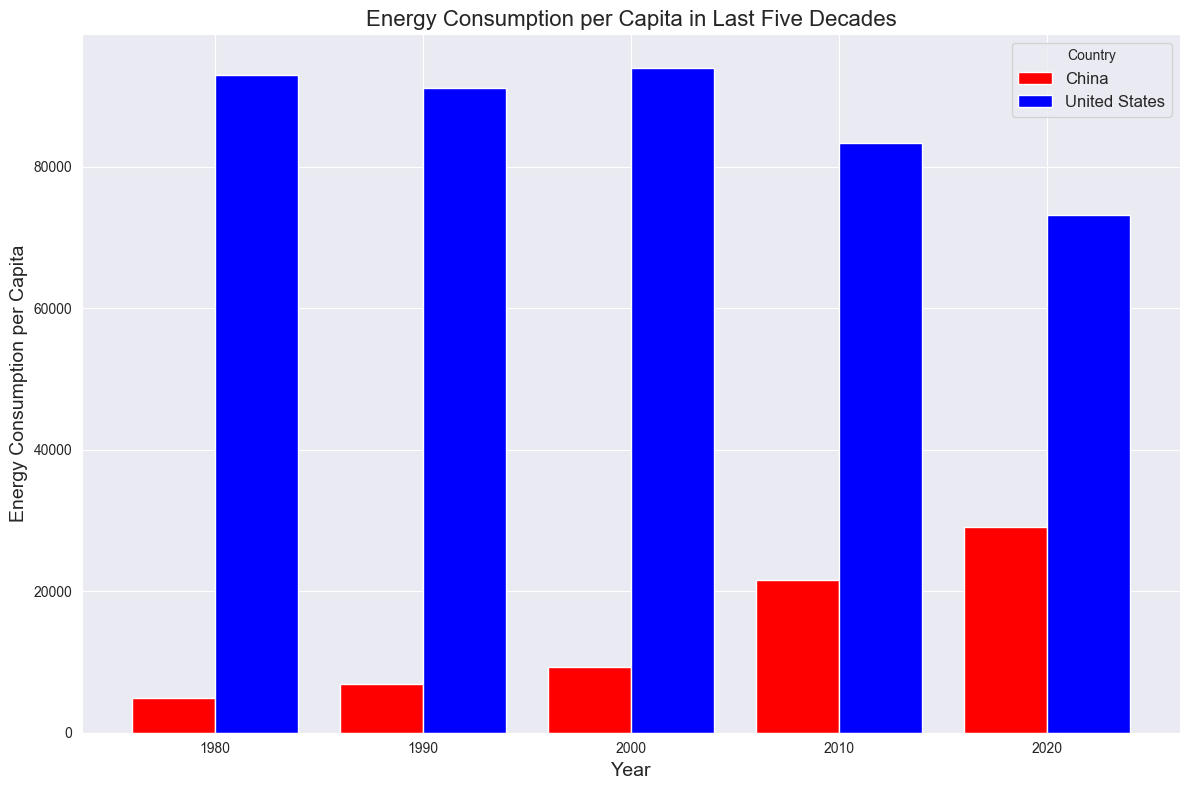

In [18]:
# Define the years of interest and filter data for China and the US
years= [1980, 1990, 2000, 2010, 2020] 
china_data = df[(df["country"] == "China") & (df["year"].isin(years))].copy()
us_data = df[(df["country"] == "United States") & (df["year"].isin(years))].copy()

# In order to get rid of NaN values, use 0 instead  
china_data.fillna(0,inplace=True)
us_data.fillna(0,inplace=True)

# Define the positions for the bars on the x-axis and bar-width
x = np.arange(len(years))
bar_width = 0.4

# Plot bar chart for China
plt.bar(
    x = x, 
    height=china_data["energy_per_capita"], 
    width=bar_width, 
    label="China",
    color = "red"
)

# Plot bar chart for US
plt.bar(
    x = x + bar_width, 
    height=us_data["energy_per_capita"], 
    width=bar_width, 
    label="United States",
    color = "blue",
)

# Add title, labels, legend, and custom x-axis ticks
plt.title("Energy Consumption per Capita in Last Five Decades")
plt.xlabel("Year")
plt.ylabel("Energy Consumption per Capita")
plt.legend(title="Country")
plt.xticks(ticks = x + bar_width / 2, labels=years)


# Display the plot
plt.show()

                                             # Interpretation of Energy Consumption per Capita

    # The United States consistently shows higher energy consumption per capita compared to China across all decades.
    # The United States maintains a relatively steady trend in per capita energy consumption.
    # China's energy consumption per capita increases significantly after 2000, especially in 2010 and 2020.
    # As a result of China's urbanization, the distance between the two countries gradually gets smaller.
    # China's per capita energy consumption is still lower despite this growth, indicating that it may rise even more as the country develops.
    

### 3 Distribution of Electricity Generation by Year 


- Analyze and interpret the distribution of energy (select either **renewable** or **non-renewable**) use rates in different years and the trends of these rates over time.

- Visualize your data in such a way that you can present them comparatively on a yearly basis and make inferences about the general trends in energy use based on this graph.

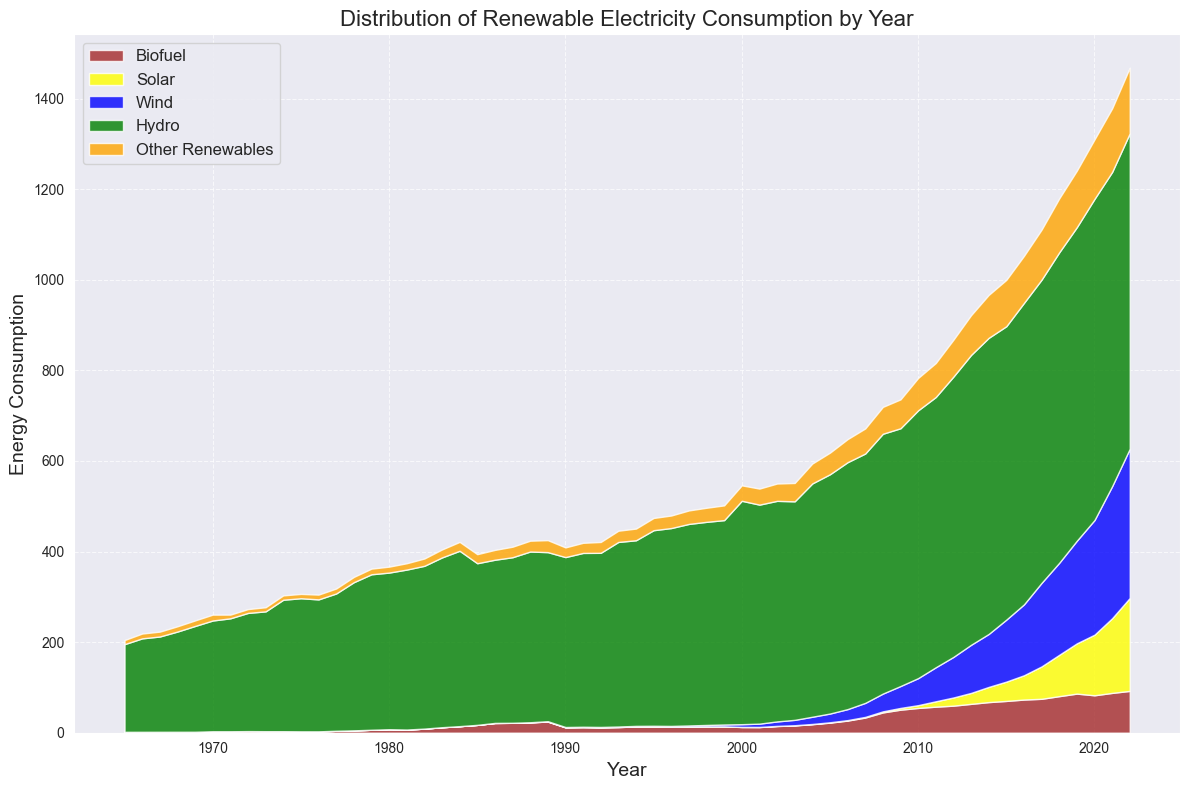

In [19]:
# Select relevant columns for analysis
interest_columns = [
    "year",
    "biofuel_consumption",
    "solar_consumption",
    "wind_consumption",
    "hydro_consumption",
    "other_renewable_consumption"
]

# Get relevant columns with a data frame copy
q3_df = df[interest_columns].copy()

# Group by year to calculate total consumption for each renewable source
df_q3_grouped = q3_df.groupby("year", as_index=False).mean()


# Plot the stacked area chart
plt.stackplot(
    df_q3_grouped["year"],
    df_q3_grouped["biofuel_consumption"],
    df_q3_grouped["solar_consumption"],
    df_q3_grouped["wind_consumption"],
    df_q3_grouped["hydro_consumption"],
    df_q3_grouped["other_renewable_consumption"],
    labels=["Biofuel", "Solar", "Wind", "Hydro", "Other Renewables"],
    colors=["brown", "yellow", "blue", "green", "orange"],
    alpha = 0.8
)

# Add titles, labels, legend and grid
plt.title("Distribution of Renewable Electricity Consumption by Year")
plt.xlabel("Year")
plt.ylabel("Energy Consumption")
plt.legend()
plt.grid(linestyle="--", alpha=0.7)

# Display the plot
plt.show()
                                             # İnterpretation of Renewable Energy Consumption 

    # Over time, hydropower continues to be the most popular renewable energy source.
    #  Both solar and wind have grown rapidly after 2000, with solar particularly after 2010.
    #  Biofuel and other renewables increase slowly, with minimal contributions compared to hydro, wind, and solar.	
    #  Since 2000, the total amount of renewable energy has grown dramatically, showing worldwide efforts to provide sustainable energy.	


### 4 Relationship of Renewable Energy Share and Carbon Intensity

- Visualize how the carbon emission intensity of countries changes as the share of renewable energy increases.

- Make inferences about the relationship between renewable energy use and carbon intensity through the visualization you have obtained.

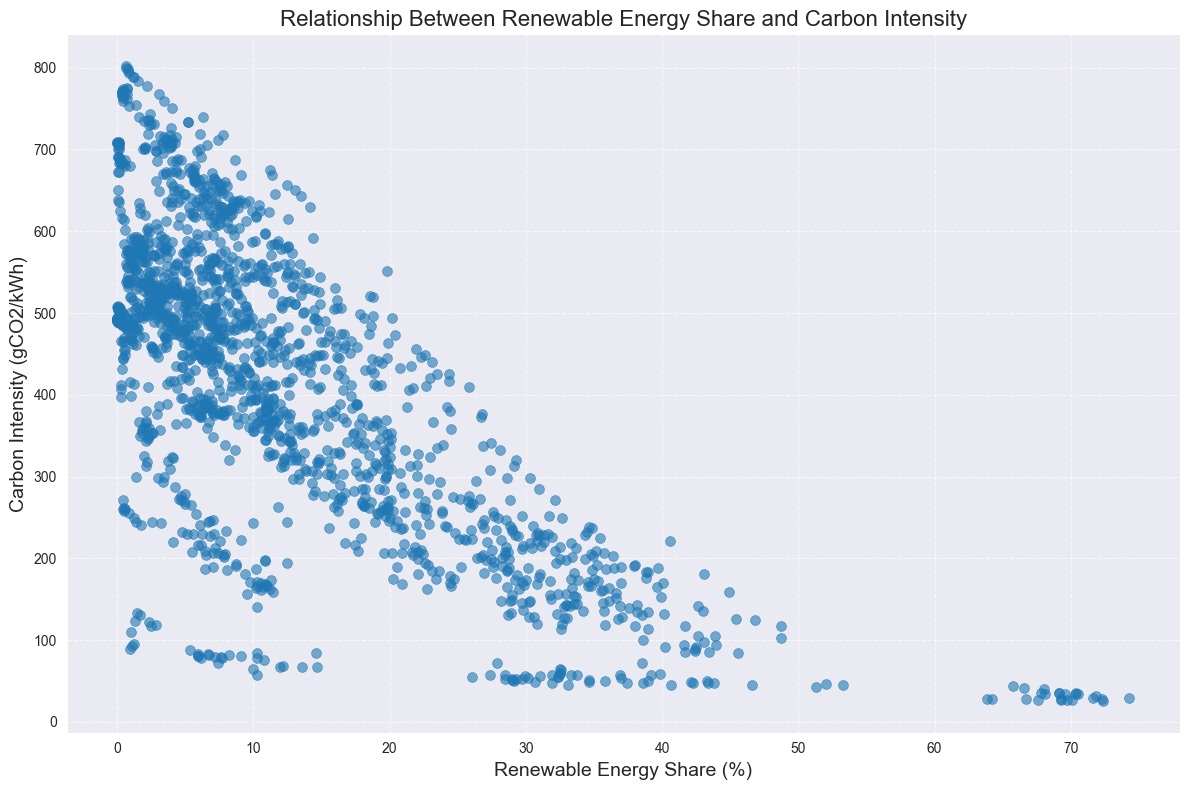

In [20]:
# Select relevant columns
q4_df=df[["country", "year", "renewables_share_energy", "carbon_intensity_elec"]].copy()

# Create a scatter plot to visualize the relationship between carbon intensity and renewables energy using sns 
sns.scatterplot(
    data=q4_df,
    x="renewables_share_energy",
    y="carbon_intensity_elec",
    alpha=0.6,
    edgecolor=None,
    s=50
)

# Add titles, labels, and grid
plt.title("Relationship Between Renewable Energy Share and Carbon Intensity")
plt.xlabel("Renewable Energy Share (%)")
plt.ylabel("Carbon Intensity (gCO2/kWh)")
plt.grid(linestyle="--", alpha=0.7)


# Display the plot
plt.show() 

                                              # Interpretation and Inferences of the Graph 
                                              
    # The share of renewable energy (%) and carbon intensity (gCO2/kWh) are clearly correlated negatively.
    # Increasing the consumption of renewable energy significantly decreases carbon intensity, illustrated by the consistently low carbon intensity (<200 gCO2/kWh) of countries with a renewable energy share > 50%.
    # There is significant variation among countries with a renewable energy contribution of less than 10%, suggesting a reliance on fossil fuels. However, certain countries may already be adopting cleaner technologies.


## 5  Energy Consumption World Map 

- Visualize a map showing the energy consumption of countries on a world map with a color scale.

- Ensure that the map also shows countries with very low energy consumption in a meaningful way, and that it is organized using an approach that allows a better understanding of the data distribution.


In [21]:
# Create a copy dataframe for analysis including just relevant columns 
q5_df = df[["country", "iso_code", "year", "primary_energy_consumption"]].copy()

# Filter out invalid ISO codes and energy consumption values
q5_df = q5_df[q5_df["iso_code"].notna() & q5_df["primary_energy_consumption"].notna()]

# Group data by iso-code and country to get a map 
q5_grouped = q5_df.groupby(["iso_code", "country"], as_index=False).sum()

# Plot the map using plotly library
fig = px.choropleth(
    q5_grouped,
    locations="iso_code",
    color="primary_energy_consumption",
    hover_name="country",
    hover_data={"primary_energy_consumption": True},
    color_continuous_scale="Plasma", 
    range_color=(0, 600000),  
    labels={"primary_energy_consumption": "Energy Consumption (TWh)"},
    title="Global Energy Consumption by Country"
)

# Adjust the layout
fig.update_layout(
    coloraxis_colorbar=dict(
        title=dict(
            text="Energy Consumption (TWh)",  
            side="right", 
        ),
        ticks="outside",
        tickvals=[0, 100000, 200000, 300000, 400000, 500000, 600000],
        ticktext=["0", "100K", "200K", "300K", "400K", "500K", "600K"],
    ),
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type="natural earth",
    ),
)

# Show the map
fig.show()
                                    
                                             # Interpretation of the graph
    # Countries like the United States, China, and Russia dominate global energy consumption, as seen in their color.
    # Moderate energy consumers, such as Germany and Canada, are represented in purple tones.
    # Dark blue regions, such as most of Africa and parts of South America, indicate low energy consumption.
    # Global energy inequality is depicted on the map, with developed countries using the most energy.

